In [35]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import pandas as pd

sns.set_theme(style='ticks', font_scale=2.0, rc={'text.usetex': True})

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'

In [36]:
data = pd.read_csv('data.csv', header=None)
data.columns = data.iloc[0]  
data = data[1:]  
data

,scene,probe_n,sps
1,shapes,0,78
2,shapes,4,713
3,shapes,8,682
4,shapes,16,653
5,shapes,32,638
6,shapes,64,462
7,shapes,128,223
8,shapes,256,60
9,shapes,512,20
10,wall,0,72


In [37]:
unique_scenes = data['scene'].unique()
print(unique_scenes)

['shapes' 'wall' 'door']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


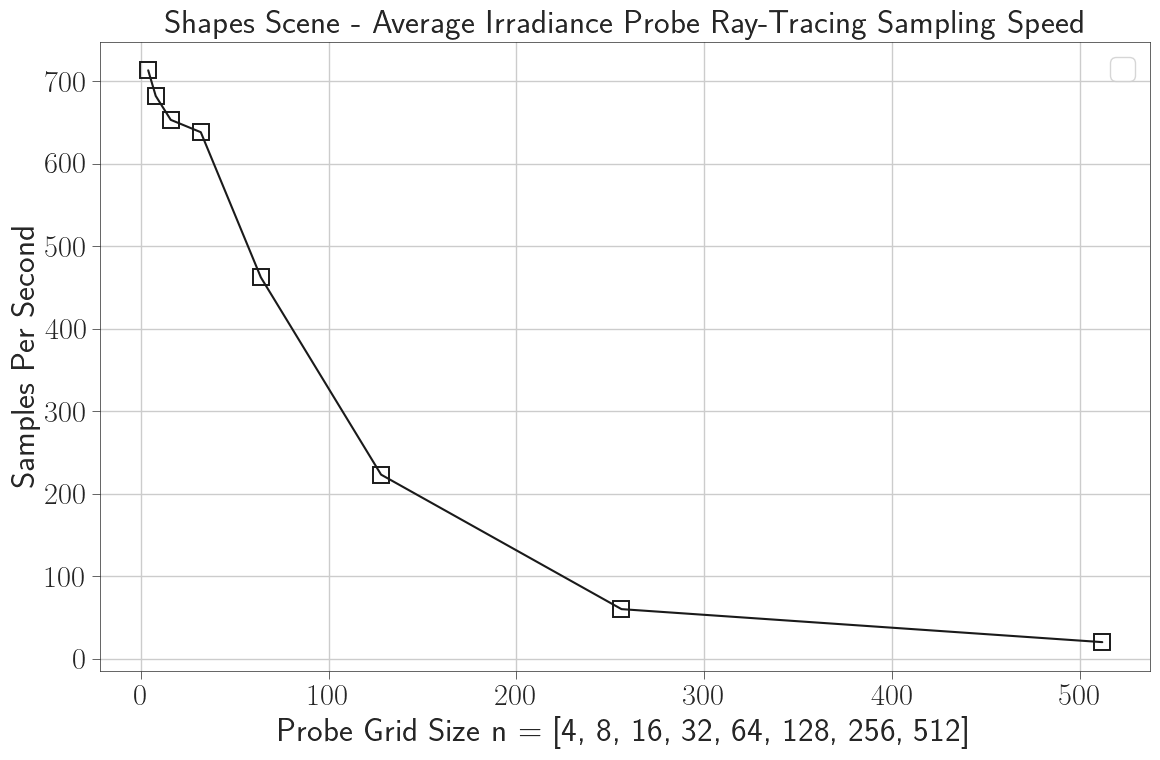

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


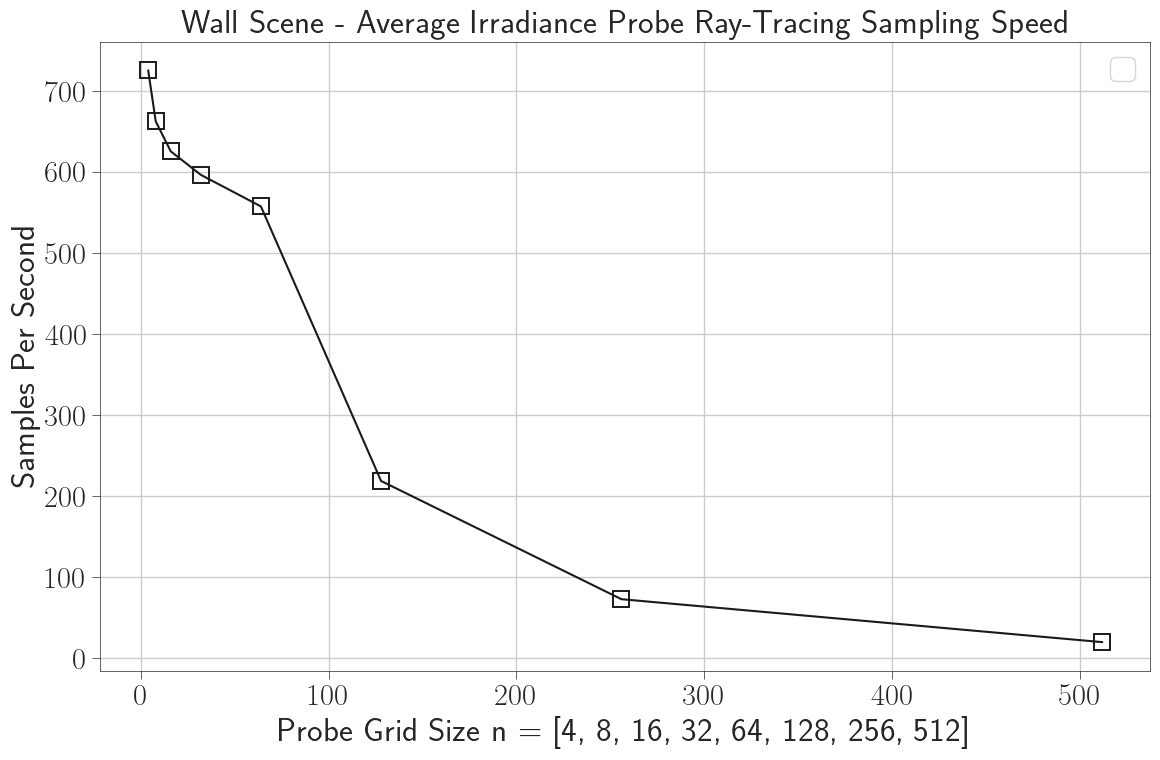

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


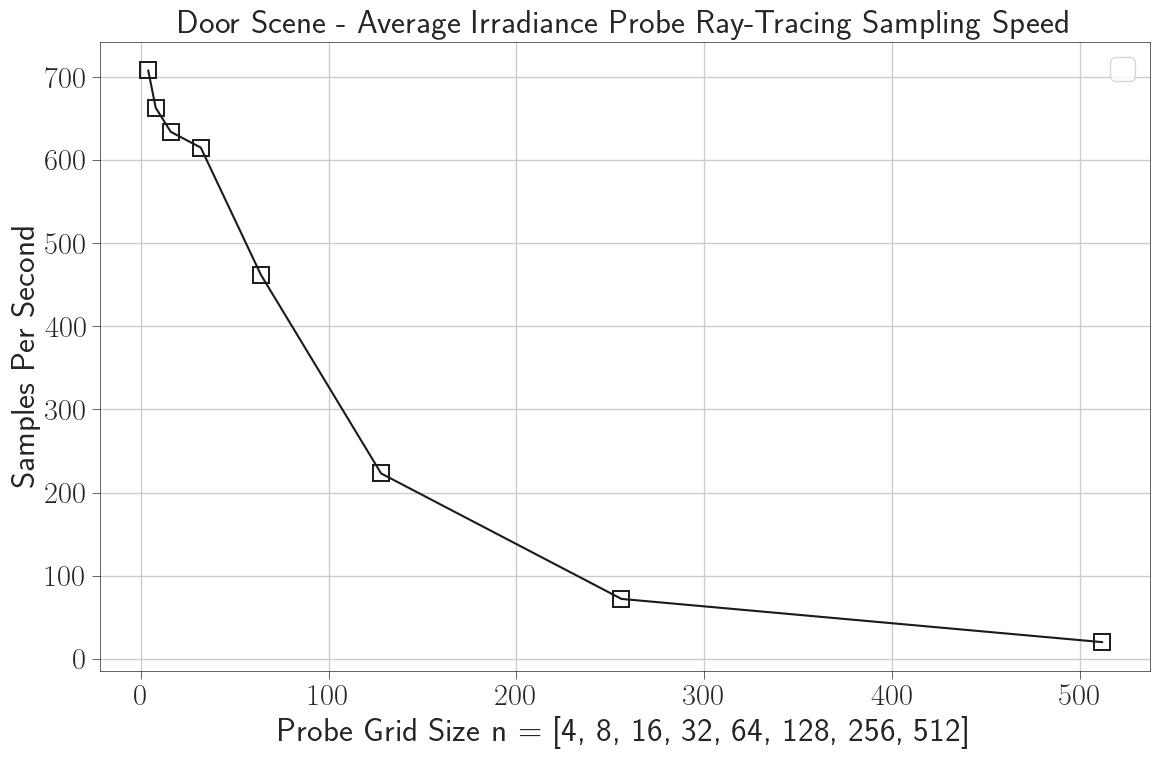

In [38]:
for scene in unique_scenes:
    
    rt = data[(data['scene'] == scene) & (data['probe_n'] == '0')]['sps'].astype(int).values[0]
    probe_n = data[(data['scene'] == scene) & (data['probe_n'] != '0')]['probe_n'].astype(int)
    sps = data[(data['scene'] == scene) & (data['probe_n'] != '0')]['sps'].astype(int)
    
    fig, ax = plt.subplots(figsize=(12, 8))

    sns.lineplot(
        x=probe_n,
        y=sps,
        marker='s',  # Circle marker
        markerfacecolor='none',
        markeredgecolor='k',
        markeredgewidth=1.4,
        markersize=12,
        color='k',
        linewidth=1.5,
        ax=ax
    )

    ax.set_title(f"{scene.capitalize()} Scene - Average Irradiance Probe Ray-Tracing Sampling Speed")
    ax.set_xlabel('Probe Grid Size n = [4, 8, 16, 32, 64, 128, 256, 512]')
    ax.set_ylabel('Samples Per Second')
    
    # ax.set_xticks(probe_n)  # Set x-axis ticks to match probe_n values
    # ax.set_xticklabels(probe_n)  # Use probe_n values as tick labels

    ax.grid(True)
    ax.legend()
    ax.tick_params(width=0.5)
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)

    plt.tight_layout()
    plt.savefig('plot/' +ax.get_title() + '.pdf', bbox_inches='tight')
    plt.show()